# Homework 02
### Sandhya

In [1]:
# (do not modify this cell)

# allowed imports only (you may not need all of these)
import sys, os
import glob
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import operator


# make plots stay inside the notebook
%matplotlib inline

# Problem 1: Processing error reports
### Processing the files


Load_report() calls a single file, reads the relevant data from the file and store it in dictionary. After that, a loop iterates through the 'Reports' directory, pass each file to this function and stores the information in list of dictionaries.

In [2]:
def load_report(filename):
    error2errorvalue = {}
    datacentre_id = '';
    
    fileDir = os.path.dirname(os.path.realpath('__file__'))
    #print(fileDir)
    filePath= os.path.join(fileDir, 'reports/'+filename)
    #print(filename)
    file = open(filePath,"r") 
    for line in file:
        line = line.strip().split("   ")
        if len(line) > 1 and line[0][-1] == ':':
            if line[0] not in error2errorvalue:
                line[0] = line[0][:-1]
                error2errorvalue[line[0]]=int(line[-1])
            else:
                #concatenate values in case of duplicate key
                error2errorvalue[line[0]]=error2errorvalue[line[0]]+int(line[-1])
        else:
            line = line[0].split(" ")
            if(line[0]=="DATACENTER"):
                datacentre_id = line[1]
            
    return datacentre_id, error2errorvalue

fileDir = os.path.dirname(os.path.realpath('__file__'))
path = os.path.join(fileDir,'reports/')
lDict = {}
listOfFiles = []
listOfId=[]
for file in os.listdir(path):
    if not file.startswith('.'):
        #print(file)
        listOfFiles.append(int(file[:-4]))
        datacentre_id, dictionary = load_report(file)
        #Dictionaries = load_report(file)
        lDict[file] = dictionary
        listOfId.append(int(datacentre_id))
        #LDict.append(listOfDictionaries)
listOfFiles.sort(reverse=True)
#print(lDict)
#print(listOfId)

## Checking Data Consistency

I am defining Consistency as data values that have similar format (integer, string or special characters), have the same length and are sequential. Consistency also includes whether there are duplicates in the data.
The function ID_consistency() checks whether Datacentre IDs are duplicate, sequential and whether they have similar format.

In [3]:
def ID_consistency(listofIds):
    id_dict={}
    duplicates_list = []
    
    
    for ID in listofIds:
        if ID not in id_dict:
            id_dict[ID]=1
        else:
            id_dict[ID]+=1
        
    
    for key in id_dict:
        if(id_dict[key] > 1):
            duplicates_list.append(key)
    if(len(duplicates_list) > 0):
        print("duplicate IDs found")
    else:
        print("no duplicate IDs")
    ,,,,,,,,,,,,,,,,,,,,,,,,
    #check ids missing by sorting 
    #by checking it manually (with eye), we see that the file count and files IDs match. 
    #we also found out above that there are no duplicates in the ID list. 
    #In order to check the sequence, I sorted the list in descending order to check whether there are any
    #inconsistencies in the IDs. 
    
    sorted_list = sorted(id_dict.items(),key=operator.itemgetter(1))
    sorted_list.reverse()
    

    if(sorted_list[0][0] == len(sorted_list)-1):
        print("Ids are sequential.")
    #print(sorted_list)
    #return sorted_list


a = ID_consistency(listOfId)

no duplicate IDs
Ids are sequential.


While the above function seems to work fine but it will not be efficient to analyze this sort of data. Hence, I have written the function 'readAllFiles()' that reads all the files from specific directory, get the error numbers from each file and store it in key-value pair. Where key is a error Mode and value is the list of errorCounts for that errorMode for all dataCentres. The index value in the list represents the ID of each datacentre. 

In [44]:
def readAllFiles():
    error2errorvalue = {}
    datacentre_id = [];

    fileDir = os.path.dirname(os.path.realpath('__file__'))
    path = os.path.join(fileDir,'reports/')
    for filename in os.listdir(path):
        filePath= os.path.join(fileDir, 'reports/'+filename)
        if not filename.startswith('.'):
            readFile =  open(filePath,"r") 
            for line in readFile:
                line = line.strip().split("   ")
                if len(line) > 1 and line[0][-1] == ':':
                    line[0] = line[0][:-1]
                    line[-1]=line[-1].strip()
                    #merging the same error types here after analyzing the data
                    if(line[0] == "Air Con." or line[0] == "A/C" or line[0] == "HVAC"):
                        #temp = line[0]
                        line[0] = line[0].replace(line[0], "A/C")
                    if line[0] not in error2errorvalue:
                        #print("line[1] is",line[-1])
                        #making list of tuples as a dictionary value. 
                        #tuple includes datacentre-reference number plus count of error
                        error2errorvalue[line[0]]= [int(line[-1])]
                        
                    else:
                        #concatenate values in case of duplicate key
                        error2errorvalue[line[0]].append(int(line[-1]))
                        #.append(tuple([3, 4]))
                        #error2errorvalue[line[0]]=error2errorvalue[line[0]].append(int(line[-1]))
    return  error2errorvalue
a=readAllFiles()
firstpairs1= {k: a[k] for k in sorted(a.keys())[:1]}
print(firstfewpairs1)




#for key in a:
    #print(len(a[key]))

{'A/C': [2, 5, 1, 2, 343, 0, 1, 0, 1, 8, 5, 6, 6, 3, 14, 4, 7, 0, 3, 2, 1, 1, 2, 1, 0, 2, 7, 1, 3, 0, 3, 3, 1, 0, 0, 1, 8, 0, 1, 2, 0, 0, 1, 2, 1, 0, 1, 1, 3, 3, 5, 0, 10, 0, 1, 2, 1, 0, 0, 3, 2, 5, 1, 2, 9, 0, 3, 2, 30, 1, 9, 0, 0, 1, 2, 2, 1, 1, 9, 2, 1, 0, 0, 3, 2, 2, 0, 5, 0, 1, 0, 203, 5, 0, 1, 2, 0, 0, 2, 0, 3, 0, 0, 0, 2, 1, 0, 0, 1, 2, 0, 4, 0, 1, 9, 0, 1, 3, 6, 34, 4, 7, 2, 8, 1, 1, 0, 0, 2, 2, 4, 11, 3, 1, 3, 0, 2, 2, 0, 0, 18, 4, 3, 2, 2, 1, 1, 0, 1, 1, 2, 1, 3, 3, 27, 5, 6, 1, 1, 510, 0, 0, 6, 0, 2, 8, 2, 77, 3, 1, 2, 4, 0, 8, 0, 2, 0, 18, 0, 2, 3, 1, 7, 1, 2, 1, 1, 3, 1, 1, 2, 5, 2, 3, 0, 6, 1, 1, 0, 1, 2, 7, 2, 4, 0, 1, 0, 0, 3, 1, 3, 0, 2, 1, 1, 0, 0, 6, 0, 1, 0, 2, 2, 13518, 2, 2, 1, 2, 5, 8, 2, 2, 3, 1, 0, 2, 1, 1, 0, 4, 1, 4, 7, 1, 1, 5, 5, 0, 4, 9, 1, 33, 3, 1, 5, 2, 1, 1, 1, 6, 29, 0, 1, 0, 0, 0, 3, 3, 2, 1, 1, 0, 1, 11, 1, 0, 3, 3, 4, 3, 2, 1, 2, 42, 2, 1, 1, 5, 6, 6, 1, 2, 1, 1, 3, 3, 1, 16, 0, 1, 2, 0, 1, 0, 3, 1, 1, 1, 3, 1, 3, 2, 4, 0, 2, 2, 1, 0, 1, 2, 0, 2, 1

The above function does store the file information efficiently but it is pretty tied up on the index. So, any kind of sorting and repositioning of the data values will result in losing the information about the datacentres. So, I have made an other function load_report_new that returns a dictionary where key is the errorMode and value is the list of tuples: where each tuple stores datacentre and errror count for that particular errorMode. I am going to make use of both of the functions based on what kind of results I need. 

In [5]:
def load_report_new():
    error2errorvalue = {}
    datacentre_id = [];

    fileDir = os.path.dirname(os.path.realpath('__file__'))
    path = os.path.join(fileDir,'reports/')
    for filename in os.listdir(path):
        filePath= os.path.join(fileDir, 'reports/'+filename)
        if not filename.startswith('.'):
            readFile =  open(filePath,"r") 
            for line in readFile:
                line = line.strip().split("   ")
                if len(line) > 1 and line[0][-1] == ':':
                    line[0] = line[0][:-1]
                    line[-1]=line[-1].strip()
                    #merging the same error types here after analyzing the data
                    if(line[0] == "Air Con." or line[0] == "A/C" or line[0] == "HVAC"):
                        #temp = line[0]
                        line[0] = line[0].replace(line[0], "A/C")
                    if line[0] not in error2errorvalue:
                        #print("line[1] is",line[-1])
                        #making list of tuples as a dictionary value. 
                        #tuple includes datacentre-reference number plus count of error
                        error2errorvalue[line[0]]= [(filename[:-4],int(line[-1]))]
                    else:
                        #concatenate values in case of duplicate key
                        error2errorvalue[line[0]].append(tuple([filename[:-4], int(line[-1])]))
                        #.append(tuple([3, 4]))
                        #error2errorvalue[line[0]]=error2errorvalue[line[0]].append(int(line[-1]))
    return  error2errorvalue
AllFiles=load_report_new()
#print(AllFiles)

### Are the **error modes** consistent? 

After getting the list of error Mode and the counts for each data centre, it seems that there are three error modes that represent the same thing but in different words namely Air Con., A/C, HVAC. So, there was some sort of inconsistency. In order to make the error modes consistent, I merged these three under a single name: A/C. Down below, is the final list of error Modes.

In [6]:
for item in AllFiles:
    print("The errormode:",item,"~ occurs in", len(AllFiles[item])," datacentres")

The errormode: Fiber pipeline in ~ occurs in 1431  datacentres
The errormode: Fiber pipeline out ~ occurs in 1431  datacentres
The errormode: A/C ~ occurs in 1431  datacentres
The errormode: Misc. elec. ~ occurs in 1431  datacentres
The errormode: Operator (employee) error ~ occurs in 1431  datacentres
The errormode: Operator (non-employee) error ~ occurs in 1431  datacentres
The errormode: Physical intrusion (person) ~ occurs in 1431  datacentres
The errormode: Physical intrusion (water) ~ occurs in 1431  datacentres
The errormode: Power/generator loss ~ occurs in 1431  datacentres
The errormode: Power/generator reduction ~ occurs in 1431  datacentres


### Are the error mode **counts** consistent?

While observing data, it was apparent that the counts in each error mode are not consistent. I define consistency as the values in data that lie between certain range. That is one data value too big or too small should not dominate the overall data set and should not create bias in the data. In order to make the error mode 'counts' consistent, The function errModeAnalysis() calculates outliers using basic statistical formula and remove them from the data. 

I have plotted the counts for two error Modes before removing outliers and after removing outliers. And the results are pretty self-explanatory.

In [7]:
def errModeAnalysis1(errorModeDict):
    
    
    err2erroCountList=[]
    newDict2={}
    superList = []
    err2erroCountList=[]
    
    
    
    for key in errorModeDict:
        errorCountList = errorModeDict.get(key)
        
        #print(errorCountList)
        
        sortedErrorCountList = sorted(errorCountList, key=lambda tup: tup[1])
        
        #print(sortedErrorCountList)
        f = lambda x,index:tuple( i[index] for i in x)
        
        dataCentreIDs = f(sortedErrorCountList,0)
        ErrorList = list(f(sortedErrorCountList,1))
        
        
        median = np.percentile(ErrorList, 50) # return 50th percentile, e.g median.
        firstQuartile = np.percentile(ErrorList, 25) # return 25th percentile, lower bound.
        thirdQuartile = np.percentile(ErrorList, 75) # return 75th percentile, upper bound.
        interQuartile = thirdQuartile - firstQuartile
        innerFaceBoundary = interQuartile*1.5
        outerFaceBoundary = interQuartile * 3
        
        list_without_outliers = []
        count=0;
        
        for idd,errorCount in sortedErrorCountList:
            #print(idd,errorCount)
            #values of error that lie outside this range are outliers, so discard
            if (errorCount < (firstQuartile- outerFaceBoundary) or (errorCount > thirdQuartile + outerFaceBoundary)):
                count+=1;
            else:
                list_without_outliers.append(tuple([idd,errorCount]))
        print("Number of outliers in",key,":",count)
        superList.append(list_without_outliers)
        
        newDict2[key] = list_without_outliers
    return newDict2
     
    


#return errList, superList, newDict
without_outlierList = errModeAnalysis1(load_report_new())



Number of outliers in Fiber pipeline in : 103
Number of outliers in Fiber pipeline out : 71
Number of outliers in A/C : 92
Number of outliers in Misc. elec. : 105
Number of outliers in Operator (employee) error : 0
Number of outliers in Operator (non-employee) error : 328
Number of outliers in Physical intrusion (person) : 75
Number of outliers in Physical intrusion (water) : 197
Number of outliers in Power/generator loss : 0
Number of outliers in Power/generator reduction : 48


# Problem 2: Error rates and statistics

### Different error modes and how often they occur:

In order to answer this question, we want to see the overall errorCount for each error value across all datacenters. In order to do that, the function OverallErrorCount() gets two dictionaries as parameters: One with outliers and one without outliers and computes total error count for errors with and without the outliers. The results are different in both the cases as demonstrated in the plots below.

In [8]:
def OverallErrorCount1(errorModeDict,withoutOutlierDict):
    
    err2erroCountList=[]
    sortederr2erroCountList = []
    
    err2erroCountListWithoutOutlier=[]
    sortedListWithoutOutlier = []
    
    for key in errorModeDict:
        errorCountList = errorModeDict.get(key)
        #print(errorCountList)
        f = lambda x,index:tuple( i[index] for i in x)
        dataCentreIDs = f(errorCountList,0)
        ErrorList = f(errorCountList,1)
        #print(ErrorList)
        sumErr =0;
        for errCount in ErrorList:
            #print(errCount)
            errCount = int(errCount)
            sumErr = sumErr+errCount
        err2erroCountList.append(tuple([key, sumErr])) 

        errorCountList = withoutOutlierDict.get(key)
        #print(errorCountList)
        f = lambda x,index:tuple( i[index] for i in x)
        dataCentreIDs = f(errorCountList,0)
        ErrorList = f(errorCountList,1)
        #print(ErrorList)
        sumErr =0;
        
        for errCount in ErrorList:
            #print(errCount)
            errCount = int(errCount)
            sumErr = sumErr+errCount
        err2erroCountListWithoutOutlier.append(tuple([key, sumErr])) 
        
    sortederr2erroCountList = sorted(err2erroCountList, key=lambda tup: tup[1], reverse=True)

    sortedListWithoutOutlier = sorted(err2erroCountListWithoutOutlier, key=lambda tup: tup[1], reverse=True)    
    return sortederr2erroCountList,sortedListWithoutOutlier

Overall_ErrorCountList, Overall_without_ErrorCountList =  OverallErrorCount1(load_report_new(),without_outlierList)


#print(Overall_ErrorCountList)
#print(Overall_without_ErrorCountList)


list1 = []
list2 = []

f = lambda x,index:tuple( i[index] for i in x)

list1 = list(range(len(Overall_ErrorCountList)))
list2 = list(range(len(Overall_without_ErrorCountList)))


tup1 = list(f(Overall_ErrorCountList,0))
tup2 = list(f(Overall_ErrorCountList,1))


tup3 = list(f(Overall_without_ErrorCountList,0))
tup4 = list(f(Overall_without_ErrorCountList,1))



#plt.subplot(1, 2, 1)


x = np.array(list1)
y = np.array(tup2)
plt.xticks(x, tup1, rotation=90)

plt.bar(x,y, color='orange')
plt.tight_layout()
plt.title('Count for each error mode before removing outlier')
#plt.xlabel('xlabel')
#plt.ylabel('ylabel')
plt.show()

#plt.subplot(1, 2, 2)


x1 = np.array(list2)
y1 = np.array(tup4)
plt.xticks(x, tup3, rotation=90)

plt.bar(x1,y1, color='cyan')
plt.tight_layout()

plt.title('Count for each error mode after removing outlier')

plt.show()
    
    
    


The following function dataCentreDict returns two dictionaries. One dictionary that contains the key value pair where key is the datacentre ID and value is the list of count of errorValues for each error mode. The only difference between two returning dictionaries is that one returns the data without removing outliers while other excludes the outliers from the data.
I want to keep the both dictionaries in order to draw comparison between the two data sets.

In [9]:
def dataCentreDict1(errorModeDict, errorDictWithoutOutliers):
    dataCentreToError = {}
    dataCentreToError_withoutoutliers = {}
    for key in errorModeDict:
        errorCountList = errorModeDict.get(key)
        for datacentreID,erroValue in errorCountList:
            if datacentreID not in dataCentreToError:
                dataCentreToError[datacentreID] = [(key,erroValue)]
            else:
                dataCentreToError[datacentreID].append(tuple([key,erroValue]))
                
        errorCountList = errorDictWithoutOutliers.get(key)  
        for datacentreID,erroValue in errorCountList:
            if datacentreID not in dataCentreToError_withoutoutliers:
                dataCentreToError_withoutoutliers[datacentreID] = [(key,erroValue)]
            else:
                dataCentreToError_withoutoutliers[datacentreID].append(tuple([key,erroValue]))
    
    return  dataCentreToError, dataCentreToError_withoutoutliers


newDiction1 , newDiction2 = dataCentreDict1(load_report_new(),without_outlierList)
#print(newDiction1)

### Do some data centers experience more errors than others?

Here, we want to use the dictionaries from previous function and do the error analysis for each data centre. My approach to check whether some data centres experience more errors than others is to take the sum of error count for all datacentres and find standard deviation among the total error counts to see how the data centre have varying error counts. The graph below shows two distribution. One distribution represents the normalized sum of errorcount for each datacentre without removing the outliers. And other one is the same but after excluding the outliers. 




### What is the typical number of errors a data center should expect?

We can find this out by looking at the average number of total error count for each data centre. The code below also calculates the avg sum of errorCount for each datacentre. So, basically we want to see the Expected Error Count for each data centre. The line graph, below shows the expected value for each data centre.

In [10]:
def DataCentreStats1(dataCentreDict,dataCentreDict_withoutOutliers ):
    sumList1 = []
    sumList2 = []
    
    AvgErrCountList1 = []
    AvgErrCountList2 = []
    #print(errorModeDict)
    
    #print(dataCentreDict_withoutOutliers)
    
    for key in dataCentreDict:
        errorCountList = dataCentreDict.get(key)
        sumErr =0;
        count=0;
        for datacentreID,erroValue in errorCountList:
            count+=1
            sumErr+=erroValue
        AvgErr = sumErr/count
        AvgErrCountList1.append([key,AvgErr])
        #AvgErrCountList1.append(AvgErr)
        sumList1.append(sumErr)
        sumList1 = sorted(sumList1)
    
        errorCountList = dataCentreDict_withoutOutliers.get(key)
        sumErr =0
        count=0
        for datacentreID,erroValue in errorCountList:
            count+=1
            sumErr +=erroValue
        avgErr = sumErr / count
        
        AvgErrCountList2.append(tuple([key,avgErr]))
    
        sumList2.append(sumErr) 
        sumList2 = sorted(sumList2)
        
    #print(sumList2)
    
    plt.subplot(2, 2, 1)
    #print(tempList)
    norm = [float(i)/sum(sumList1) for i in sumList1]
    norm = [float(i)/max(sumList1) for i in sumList1]
    sumList1 = norm

        
    #print("mean of each data centre",hmean1)
    hmean1 = np.mean(sumList1)
    hstd1 = np.std(sumList1)
    pdf1 = stats.norm.pdf(sumList1, hmean1, hstd1)
    
    #print(hmean1,hstd1,pdf1)

    plt.gca().set(xlabel='Data centre ID', ylabel='Expected Error value')

        
    plt.title('Distribution (normalized data)', loc='left')

    plt.plot(sumList1, pdf1) 
    plt.tight_layout()
    
    plt.subplot(2, 2, 2)
    
    hmean2 = np.mean(sumList2)
    hstd2 = np.std(sumList2)
    pdf2 = stats.norm.pdf(sumList2, hmean2, hstd2)
    # plt.title('Distribution after removing the outliers', loc='left')
    plt.title('Distribution (excluding outliers)', loc='left')

    
    plt.plot(sumList2, pdf2) 
    plt.tight_layout()
    
    plt.show()
    
    
    
    #plt.subplot(2, 2, 3)

    
    dataCentreID =  np.array(list2)
    avgErrCount = np.array(AvgErrCountList2)
    
    f = lambda x,index:tuple( i[index] for i in x)
    dataCentreIDs = f(AvgErrCountList2,0)
    ErrorList = f(AvgErrCountList2,1)
    
   # print(dataCentreIDs)
    #print(ErrorList)
    
    #plt.plot(dataCentreIDs, ErrorList, color='purple')
    plt.scatter(dataCentreIDs, ErrorList, color='green')

    plt.title('Expected ErrorCount value for Data Centers.',  loc='left')
    plt.gca().set(xlabel='Data centre ID', ylabel='Expected Error value')

    
    plt.show()


   
DataCentreStats1(newDiction1, newDiction2)



### What are the most common types of errors experienced by data centers? 

Common types of error would mean the errors that occur often.
There are two ways to answer this question.
1. We can find out the most common types of error overall for all datacenters.
2.  we can find out the most common types of error occuring within a datacenter.



### Most common types of error overall for all datacenters


In [11]:

list1 = list(range(len(Overall_ErrorCountList)))
tup3 = list(f(Overall_without_ErrorCountList,0))
tup4 = list(f(Overall_without_ErrorCountList,1))


i=0;

print("Top three common error types are:")
for item in Overall_without_ErrorCountList:
    if(i<3):
        print(item[0],' occured',item[1], ' times')
        i+=1
x1 = np.array(list2)
y1 = np.array(tup4)

plt.xticks(x, tup3, rotation=90)

plt.bar(x1,y1, color='green')
plt.tight_layout()

plt.title('Count for each error mode after removing outlier')
plt.gca().set(xlabel='Error Mode', ylabel='Error Mode count')

plt.show()

Top three common error types are:
Misc. elec.  occured 13069  times
Fiber pipeline in  occured 2732  times
A/C  occured 2710  times


### Most common types of error occuring within a datacenter


I want to check top 5 common errors in each datacenter

In [37]:
def MostCommonErrorWithinDataCentre(dataCentreDict,dataCentreDict_withoutOutliers ):

    
    mostCommonErrDict = {}
    mostCommonErrDict_withoutOutlier = {}

    #print(errorModeDict)
    
    #print(dataCentreDict_withoutOutliers)
    
    for key in dataCentreDict:
        errorCountList = dataCentreDict.get(key)
        errorCountList = sorted(errorCountList, key=lambda tup: tup[1], reverse=True)[:5]
        #print(errorCountList)
        mostCommonErrDict[key] = errorCountList
    #print(mostCommonErrDict)

    for key in dataCentreDict_withoutOutliers:
        errorCountList1 = dataCentreDict_withoutOutliers.get(key)
        errorCountList1 = sorted(errorCountList1, key=lambda tup: tup[1], reverse=True)[:5]
        mostCommonErrDict_withoutOutlier[key] = errorCountList1
        
    #first2pairs = {k: mostCommonErrDict_withoutOutlier[k] for k in mostCommonErrDict_withoutOutlier.keys()[:2]}
    firstfewpairs = {k: mostCommonErrDict_withoutOutlier[k] for k in sorted(mostCommonErrDict_withoutOutlier.keys())[:40]}

    print(firstfewpairs)


   
MostCommonErrorWithinDataCentre(newDiction1, newDiction2)

{'000000': [('Misc. elec.', 30), ('Fiber pipeline in', 3), ('A/C', 2), ('Fiber pipeline out', 1), ('Physical intrusion (water)', 1)], '000001': [('Misc. elec.', 14), ('A/C', 5), ('Fiber pipeline in', 3), ('Physical intrusion (water)', 2), ('Fiber pipeline out', 1)], '000002': [('Misc. elec.', 5), ('Fiber pipeline in', 1), ('Fiber pipeline out', 1), ('A/C', 1), ('Operator (employee) error', 0)], '000003': [('Misc. elec.', 6), ('A/C', 2), ('Physical intrusion (water)', 2), ('Fiber pipeline in', 1), ('Fiber pipeline out', 0)], '000004': [('Operator (employee) error', 0), ('Power/generator loss', 0)], '000005': [('Fiber pipeline in', 3), ('Misc. elec.', 3), ('Fiber pipeline out', 1), ('Physical intrusion (water)', 1), ('A/C', 0)], '000006': [('Misc. elec.', 8), ('Fiber pipeline in', 1), ('A/C', 1), ('Fiber pipeline out', 0), ('Operator (employee) error', 0)], '000007': [('Misc. elec.', 8), ('Fiber pipeline in', 2), ('Power/generator reduction', 1), ('Fiber pipeline out', 0), ('A/C', 0)], '

### Ask and answer at least two more questions of these data!


### 1. What is the error count distrbution of Fiber Pipeline In?

I want to see how the error counts are distributed among data centre for a particular error value: Fiber pipeline in
So, I am making a histogram that represents how many types a particular error value for this error mode has appeared in all datacentres.
There are two graphs. One that represents the error values without removing the outliers in that error mode and the other one shows the results after removing the outliers.


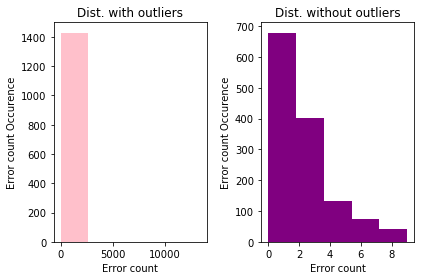

In [13]:
tempList = AllFiles.get("Fiber pipeline in")
f = lambda x,index:tuple( i[index] for i in x)
dataCentreIDs = f(tempList,0)
ErrorList = list(f(tempList,1))


plt.subplot(1, 2, 1)
plt.hist(ErrorList,bins = 5 , color='pink')
plt.title("Dist. with outliers")
plt.gca().set(xlabel='Error count', ylabel='Error count Occurence')

plt.tight_layout()


tempList = without_outlierList.get("Fiber pipeline in")
f = lambda x,index:tuple( i[index] for i in x)
ErrorList_2 = list(f(tempList,1))


plt.subplot(1, 2, 2)
plt.hist(ErrorList_2,bins = 5, color='purple')
plt.title("Dist. without outliers")
plt.gca().set(xlabel='Error count', ylabel='Error count Occurence')

plt.tight_layout()

### 2. Do some data centre experience more error types than others or all error types appear in all?

In [14]:
for key in newDiction2:
    errorCountList = newDiction2.get(key)
    errTypeCount = len(errorCountList)
    print("Datacenter ",key," faces", errTypeCount,"error types")


Datacenter  000008  faces 10 error types
Datacenter  000018  faces 10 error types
Datacenter  000025  faces 9 error types
Datacenter  000029  faces 10 error types
Datacenter  000031  faces 10 error types
Datacenter  000032  faces 10 error types
Datacenter  000035  faces 10 error types
Datacenter  000040  faces 10 error types
Datacenter  000046  faces 10 error types
Datacenter  000047  faces 9 error types
Datacenter  000050  faces 9 error types
Datacenter  000056  faces 9 error types
Datacenter  000057  faces 10 error types
Datacenter  000060  faces 9 error types
Datacenter  000062  faces 10 error types
Datacenter  000073  faces 9 error types
Datacenter  000079  faces 10 error types
Datacenter  000080  faces 9 error types
Datacenter  000081  faces 10 error types
Datacenter  000082  faces 10 error types
Datacenter  000084  faces 9 error types
Datacenter  000085  faces 10 error types
Datacenter  000088  faces 10 error types
Datacenter  000097  faces 10 error types
Datacenter  000103  face

Datacenter  000277  faces 9 error types
Datacenter  000279  faces 10 error types
Datacenter  000290  faces 10 error types
Datacenter  000292  faces 9 error types
Datacenter  000293  faces 10 error types
Datacenter  000302  faces 10 error types
Datacenter  000304  faces 10 error types
Datacenter  000306  faces 10 error types
Datacenter  000309  faces 10 error types
Datacenter  000317  faces 10 error types
Datacenter  000321  faces 10 error types
Datacenter  000330  faces 10 error types
Datacenter  000336  faces 10 error types
Datacenter  000338  faces 10 error types
Datacenter  000342  faces 10 error types
Datacenter  000343  faces 10 error types
Datacenter  000349  faces 10 error types
Datacenter  000351  faces 10 error types
Datacenter  000357  faces 9 error types
Datacenter  000360  faces 10 error types
Datacenter  000361  faces 10 error types
Datacenter  000364  faces 10 error types
Datacenter  000365  faces 10 error types
Datacenter  000374  faces 10 error types
Datacenter  000379 

Datacenter  000344  faces 10 error types
Datacenter  000354  faces 10 error types
Datacenter  000355  faces 10 error types
Datacenter  000386  faces 9 error types
Datacenter  000397  faces 10 error types
Datacenter  000415  faces 9 error types
Datacenter  000418  faces 10 error types
Datacenter  000419  faces 10 error types
Datacenter  000423  faces 10 error types
Datacenter  000425  faces 9 error types
Datacenter  000427  faces 10 error types
Datacenter  000442  faces 9 error types
Datacenter  000451  faces 8 error types
Datacenter  000455  faces 10 error types
Datacenter  000459  faces 10 error types
Datacenter  000470  faces 9 error types
Datacenter  000489  faces 10 error types
Datacenter  000494  faces 10 error types
Datacenter  000515  faces 10 error types
Datacenter  000521  faces 8 error types
Datacenter  000526  faces 10 error types
Datacenter  000531  faces 10 error types
Datacenter  000549  faces 9 error types
Datacenter  000568  faces 9 error types
Datacenter  000577  faces

Datacenter  001075  faces 6 error types
Datacenter  001319  faces 4 error types
Datacenter  001195  faces 8 error types
Datacenter  000009  faces 5 error types
Datacenter  000375  faces 6 error types
Datacenter  000680  faces 6 error types
Datacenter  000004  faces 2 error types
Datacenter  000068  faces 4 error types
Datacenter  000091  faces 3 error types
Datacenter  000119  faces 3 error types
Datacenter  000131  faces 4 error types
Datacenter  000140  faces 4 error types
Datacenter  000154  faces 3 error types
Datacenter  000159  faces 2 error types
Datacenter  000167  faces 3 error types
Datacenter  000177  faces 4 error types
Datacenter  000223  faces 2 error types
Datacenter  000251  faces 3 error types
Datacenter  000260  faces 2 error types
Datacenter  000283  faces 2 error types
Datacenter  000297  faces 5 error types
Datacenter  000353  faces 2 error types
Datacenter  000378  faces 4 error types
Datacenter  000422  faces 3 error types
Datacenter  000464  faces 4 error types


### 3. I also want to check which errortype appears in all of the datacentres

In [15]:
#print(newDiction2)
newDict = {}
newDict1 = {}
for key in newDiction2:
    errorCountList = newDiction2.get(key)
    for errType, count in errorCountList:
        if errType not in newDict:
            newDict[errType] =1
        else:
            newDict[errType]+=1
        
        if errType not in newDict1:
            newDict1[errType] = count
        else:
            newDict1[errType]=newDict1[errType]+count


finaldict = {key:(newDict[key], newDict1[key]) for key in newDict}
keys = newDict.keys()
list1 = list(range(len(keys)))

values = np.fromiter(iter(newDict.values()), dtype=int)
x = np.array(list1)
y = np.array(values)
plt.xticks(x, keys, rotation=90)

plt.bar(x,y, color='blue')
plt.gca().set(xlabel='error types', ylabel='Datacentre count')
plt.tight_layout()
plt.title('Error mode occurence In Data centres')
#plt.xlabel('xlabel')
#plt.ylabel('ylabel')
plt.show()


### Being very careful as you interpret your analyses, what are the **riskiest** error modes in terms of shutting down data centers?

"Riskiest" errors are those errors that can result in extensive damange at the data centers. With that definition and using common sense, it seems that the errors related to power loss/reduction, human operator and water would be the riskiest but that would be too generalized becuase these error types can result in high damage IF and WHEN occured. 


We want to see which errors occur in all the datacentres and see their effect. So, I define riskiest errors as those errors that are being faced by all the datacentres. 

As observed below, **Operator (employee) error** and **Power/generator loss** are two error types that are in every datacenter but the point to note is that their overall count is 0 that means we do not want to define ***riskiest error*** only based on their presence in datacenters but also on the basis of their overall counts.



In [16]:
print("**Error types that are faced by all the datacenters are**")
for tuplee in finaldict:
    if finaldict.get(tuplee)[0] == 1431:
        print (tuplee, ', appear in', finaldict.get(tuplee)[0] ,'with total sum of',finaldict.get(tuplee)[1])
print("_________________________________________________________________________")

**Error types that are faced by all the datacenters are**
Operator (employee) error , appear in 1431 with total sum of 0
Power/generator loss , appear in 1431 with total sum of 0
_________________________________________________________________________


So, I would classify the errors as riskiest if the error type appears in more than the avg number of files and its median error count is more than the avg of all the error counts

In [17]:
from numpy import median

avgNumOfFiles =0
sumNumOfFiles=0;

medianList =[]

for tuplee in finaldict:
   
    if finaldict.get(tuplee)[1] != 0:
        print (tuplee, ', appear in', finaldict.get(tuplee)[0] ,'with total sum of',finaldict.get(tuplee)[1])
        sumNumOfFiles+=finaldict.get(tuplee)[0]
        medianList.append(finaldict.get(tuplee)[1])
        
print("_______________________________________________")


avgNumOfFiles = sumNumOfFiles/6
print("avg number of files",int(avgNumOfFiles))
print("median of error counts", int(median(medianList)))

Fiber pipeline in , appear in 1328 with total sum of 2732
Fiber pipeline out , appear in 1360 with total sum of 835
A/C , appear in 1339 with total sum of 2710
Misc. elec. , appear in 1326 with total sum of 13069
Physical intrusion (water) , appear in 1234 with total sum of 1720
Power/generator reduction , appear in 1383 with total sum of 585
_______________________________________________
avg number of files 1328
median of error counts 2215


In [18]:

for tuplee in finaldict:
    if finaldict.get(tuplee)[0] >= int(avgNumOfFiles) and finaldict.get(tuplee)[1] >= median(medianList):
        print (tuplee, ', appear in', finaldict.get(tuplee)[0] ,'with total sum of',finaldict.get(tuplee)[1])
        #sumNumOfFiles+=finaldict.get(tuplee)[0]
        #sumNumOfErrCount+=finaldict.get(tuplee)[1]
        
print("_______________________________________________")


Fiber pipeline in , appear in 1328 with total sum of 2732
A/C , appear in 1339 with total sum of 2710
_______________________________________________


So **Fiber pipeline in** and **A/C** are the riskiest error based on my definition.

# Problem 3: Flood risk


### What proportion of the errors at each data center is due to water? Rank the  NN  data centers according to flood risk, from a rank of  R=1R=1  (most at risk) to  R=NR=N  least at risk. Develop a visualization or other data presentation to display this information compactly.
As per my observation and search, there are three error modes that can play some part in flood damage: Physical Intrusion(Water), Fiber Pipeline In, Fiber Pipeline Out.  

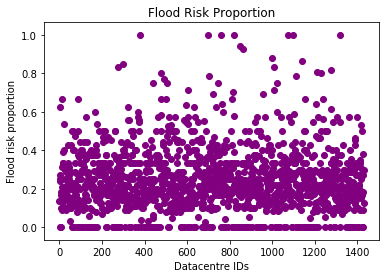

In [19]:
def ErrProportionOfFloodRisk(dataCentreDict ):

    #print(errorModeDict)
    
    #print(dataCentreDict_withoutOutliers)
    errPropList = []
   
    for key in dataCentreDict:
        try:
            errorCountList = dataCentreDict.get(key)
            Totalsum=0
            summ=0
            for i, j in errorCountList:
                if(i == 'Fiber pipeline in' or i == 'Fiber pipeline out' or i == 'Physical intrusion (water)'):
                    summ+=j
                else:
                    Totalsum+=j
            errPropList.append(tuple([key,  summ, summ/(Totalsum+summ)]))
            errPropList = sorted(errPropList, key=lambda tup: tup[2], reverse=True)
        except ZeroDivisionError:
            errPropList.append(tuple([key,summ, 0]))
    return errPropList
    
FloodProportion = ErrProportionOfFloodRisk(newDiction2)


f = lambda x,index:tuple( i[index] for i in x)
dataCentreIDs = f(FloodProportion,0)
proportion = f(FloodProportion,2)
    

rank = list(range(len(proportion)))
#print(rank)


# print(dataCentreIDs)
#print(ErrorList)
    
#plt.plot(dataCentreIDs, ErrorList, color='purple')

plt.scatter(dataCentreIDs, proportion, color='purple')
plt.title('Flood Risk Proportion',  loc='center')
plt.gca().set(xlabel='Datacentre IDs', ylabel='Flood risk proportion')
plt.show()
    


plt.scatter(rank, proportion, color='purple')
plt.title('Proportion with ranks',  loc='center')
plt.gca().set(xlabel='rank(1-N)', ylabel='proportion values')
plt.show()



### When ranking of data centers according to flood risk, incorporate uncertainty in your risk proportions. Determine how best to do this, and **justify** your analysis choices.

I am using wilson confidence interval in order to incorporate the uncertainty in the ranks. The function wilson_lower_confidence is taken from your lecture notes while I have made few minor changes in order to make it work with my data format.

The function now returns a list of tuples where each tuple contains datacentre ID, original proportion values without uncertainty and new  proportion values with uncertainty.

In [24]:
import math
#print(FloodProportion)

f = lambda x,index:tuple( i[index] for i in x)
dataCentreIDs = f(FloodProportion,0)

nlist = f(FloodProportion,1)
pList = f(FloodProportion,2)

#print(pList)     
        
def wilson_lower_confidence(z=1.96):
    """`num` samples, `pos` of which are positive = true = 1. The rest 
    are negative = false = 0. `z` is the normal proportion for confidence
    interval, default z = 1.96 (95%)
    """
    #n = num
    plist1 = []
    for k, n, p1 in FloodProportion:
        
        try:
            p = p1 / n
            pVal = (p + z*z/(2*n) - z*math.sqrt((p*(1-p) + z**2/(4*n))/n)) / (1 + z**2/n)
            #print(pVal)
            plist1.append(tuple([k, p1, pVal]))
            plist1 = sorted(plist1, key=lambda tup: tup[2], reverse=True)
            #print(plist1)
        except ZeroDivisionError:
            plist1.append(tuple([k,p1, 0]))
            #plist1.append(0)
            
    return plist1
    
uncertainty_ranked = wilson_lower_confidence(z=1.96)

#printing first 50
print(uncertainty_ranked[:50])

[('001319', 1.0, 0.045586062644636216), ('000014', 0.6666666666666666, 0.04525377293561883), ('000504', 0.75, 0.03684016062002763), ('001009', 0.8333333333333334, 0.026327190759257157), ('000697', 1.0, 0.02567895594897479), ('001099', 1.0, 0.02567895594897479), ('001024', 0.6, 0.024624847406362275), ('000809', 0.6666666666666666, 0.022219111784936428), ('000503', 0.6666666666666666, 0.022219111784936428), ('000475', 0.6666666666666666, 0.022219111784936428), ('001006', 0.7142857142857143, 0.02003539887549569), ('000605', 0.7142857142857143, 0.02003539887549569), ('000378', 1.0, 0.019890371327130518), ('000440', 0.75, 0.01815842741292991), ('000758', 1.0, 0.01787574951572113), ('000940', 0.5, 0.01765226206463418), ('001258', 0.5, 0.01765226206463418), ('001423', 0.5, 0.01765226206463418), ('000215', 0.5, 0.01765226206463418), ('000477', 0.5, 0.01765226206463418), ('000337', 0.5, 0.01765226206463418), ('000510', 0.5, 0.01765226206463418), ('000536', 0.5, 0.01765226206463418), ('000893', 

### Rank data centers by their flood risk both with and without uncertainty, then determine an appropriate statistics for comparing how the *ranks* change.

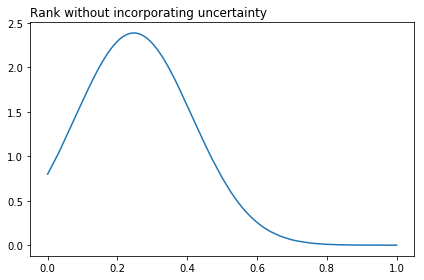

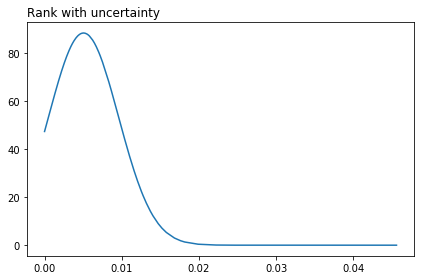

In [21]:


#print("mean of each data centre",hmean1)
hmean1 = np.mean(proportion)
hstd1 = np.std(proportion)
pdf1 = stats.norm.pdf(proportion, hmean1, hstd1)
    
#print(hmean1,hstd1,pdf1)

plt.title('Rank without incorporating uncertainty', loc='left')

plt.plot(proportion, pdf1) 
plt.tight_layout()
plt.show()


f = lambda x,index:tuple( i[index] for i in x)
dataCentreIDs = f(uncertainty_ranked,0)
oldproportion = f(uncertainty_ranked,1)
newproportion = f(uncertainty_ranked,2)

#print(newproportion)
#print("mean of each data centre",hmean1)
hmean1 = np.mean(newproportion)
hstd1 = np.std(newproportion)
pdf1 = stats.norm.pdf(newproportion, hmean1, hstd1)

#print(hmean1,hstd1,pdf1)

plt.title('Rank with uncertainty', loc='left')
plt.plot(newproportion, pdf1) 
plt.tight_layout()




In order to compare both ranks, we might want to look in to different statistical tests like
1. paired t-test: "a statistical procedure used to determine whether the mean difference between two sets of observations is zero".
2. Wilcoxon signed rank test: "The Wilcoxon signed-rank test is a non-parametric statistical hypothesis test used when comparing two related samples, matched samples, or repeated measurements on a single sample to assess whether their population mean ranks differ"
3. sign test: "The sign test is a statistical method to test for consistent differences between pairs of observations, such as the weight of subjects before and after treatment. Given pairs of observations (such as weight pre- and post-treatment) for each subject, the sign test determines if one member of the pair (such as pre-treatment) tends to be greater than (or less than) the other member of the pair (such as post-treatment)"

Sign test is good for quick analysis. It would result in whether there is a difference or not. And it will not say anything about the magnitude (how much) of the difference. So, I think Wilcoxon signed rank test is best suited for the problem we are trying to solve.


Below, I have calculated the difference between the values of proportion for each datacenter.

In [26]:


f = lambda x,index:tuple( i[index] for i in x)
dataCentreIDs = (f(uncertainty_ranked,0))
oldproportion = (f(uncertainty_ranked,1))
newproportion = (f(uncertainty_ranked,2))

#print(newproportion)

#a=map(operator.sub, oldproportion, newproportion)
#print(oldproportion[1],newproportion[1])

difference = list(map(operator.sub, oldproportion, newproportion))


#print(difference)

print(difference[:50])

[0.9544139373553637, 0.6214128937310478, 0.7131598393799724, 0.8070061425740762, 0.9743210440510253, 0.9743210440510253, 0.5753751525936377, 0.6444475548817302, 0.6444475548817302, 0.6444475548817302, 0.6942503154102186, 0.6942503154102186, 0.9801096286728694, 0.73184157258707, 0.9821242504842789, 0.48234773793536584, 0.48234773793536584, 0.48234773793536584, 0.48234773793536584, 0.48234773793536584, 0.48234773793536584, 0.48234773793536584, 0.48234773793536584, 0.48234773793536584, 0.48234773793536584, 0.48234773793536584, 0.48234773793536584, 0.3823735485242214, 0.3823735485242214, 0.554605908700356, 0.554605908700356, 0.554605908700356, 0.554605908700356, 0.554605908700356, 0.554605908700356, 0.554605908700356, 0.554605908700356, 0.554605908700356, 0.554605908700356, 0.554605908700356, 0.554605908700356, 0.554605908700356, 0.554605908700356, 0.6092239096029803, 0.6092239096029803, 0.6092239096029803, 0.6092239096029803, 0.7847953629865806, 0.7847953629865806, 0.9851352905492265]


### The third image is taken from what movie?

##### **Space Odyssey**